In [1]:
import matplotlib.pyplot as plt
from math import sqrt
from time import sleep, time
from random import seed
from DE import DifferentialEvolution
from Packomania import Packomania

In [15]:
def get_coordinates(solution):
    x = []
    y = []
    for i in range(0, len(solution), 2):
        x.append(solution[i])
        y.append(solution[i+1])
    return x, y


def plot_solution(solution):
    x, y = get_coordinates(solution)
    plt.plot(x, y, '.')
    plt.show()

def plot_best_solution_progress(solutions, duration=20):
    fig, ax = plt.subplots(figsize=(7, 7))
    h1, = ax.plot([], [], '.')
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    for i, solution in enumerate(solutions):
        x, y = get_coordinates(solution)
        
        h1.set_data(x, y)
        ax.set_title(f"Generation {i+1}")
        fig.canvas.draw()

        sleep(duration/len(solutions))
        
def plot_population_progress(populations, best_solutions, duration=20):
    fig, ax = plt.subplots(figsize=(7, 7))
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.1])
    
    fig_points = [ax.plot([], [], 'b.')[0] for i in range(len(populations[0]))]
    fig_points.append(ax.plot([], [], 'r.')[0]) # Additial for the best solution

    for i, (population, best_solution) in enumerate(zip(populations, best_solutions)):
        start_time = time()
        # Plot the solutions in a generation
        for j, solution in enumerate(population):
            x, y = get_coordinates(solution)
            fig_points[j].set_data(x, y)
        
        # Plot best solution
        x, y = get_coordinates(best_solution)
        fig_points[j+1].set_data(x, y)
        
        ax.set_title(f"Generation {i+1}")
        fig.canvas.draw()
        
        end_time = time()
        sleep(max(0, duration/len(populations) - (end_time-start_time)))
    

def plot_obj_value_progress(obj_values, optimum, title=None):
    x = range(1, len(obj_values)+1)
    plt.plot(x, obj_values)
    plt.hlines(optimum, x[0], x[-1])
    
#     plt.ylim([0, optimum*1.1])
    plt.xlabel("Generation")
    plt.ylabel("Objective value")
    plt.title(title)


def scattering_points(solution):
    # Scattering points problem
    # The solution are encoded as an array of [x1, y1, x2, y2, ..., xn, yn]
    
    d = []
    for i in range(0, len(solution), 2):
        for j in range(0, len(solution), 2):
            if i != j:
                x1, y1 = solution[i:i+2]
                x2, y2 = solution[j:j+2]
                d.append((x1 - x2)**2 + (y1 - y2)**2)
    return min(d)

def get_stricter_bounds(num_points):
    # Split the bounds of [0,1] into smaller bounds for each points such that each point is in its own compartment
    bounds = []
    squares = int(sqrt(num_points))
    
    dx = 1 / squares
    dy = 1 / squares
    
    for y in range(squares):
        y_lb = y * dy
        y_ub = (y+1) * dy
        for x in range(squares):
            x_lb = x * dx
            x_ub = (x+1) * dx
            bounds.append([x_lb, x_ub])
            bounds.append([y_lb, y_ub])
    
    # Add the remaining bounds to be [0,1]
    for i in range(num_points*2 - len(bounds)):
        bounds.append([0, 1])
    return bounds

In [3]:
num_points = 10
bounds = [[0, 1] for i in range(num_points*2)]
popsize = 1000
differential_weight = 0.7         
crossover_prob = 0.9              
max_iterations = 1000   

In [4]:
# Standard DE
# set random seed
seed(0)
de = DifferentialEvolution(
    scattering_points, bounds, popsize, differential_weight, crossover_prob, max_iterations)
de.run(crossover='std',save_pop_each_iter=True,stop_on_no_improvements=True ,verbose=False)

In [5]:
# Improved DE with strict bounds + crossover on points
seed(0)
strict_bounds = get_stricter_bounds(num_points)
de_strict = DifferentialEvolution(
    scattering_points, strict_bounds, popsize, differential_weight, crossover_prob, max_iterations)
de_strict.run(crossover='points',save_pop_each_iter=True,stop_on_no_improvements=True ,verbose=False)

In [6]:
pk = Packomania(num_points)
optimum = pk.points_min_dist

<IPython.core.display.Javascript object>


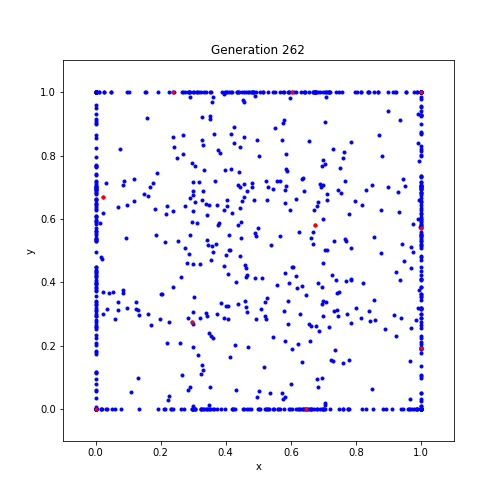

<IPython.core.display.Javascript object>


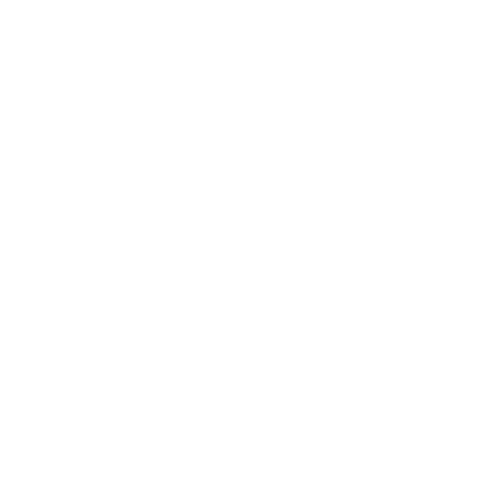

In [16]:
# Progress animation

# %matplotlib notebook
# plot_best_solution_progress(de.iter_best_agent)

%matplotlib notebook
plot_population_progress(de.iter_population, de.iter_best_agent)

<IPython.core.display.Javascript object>


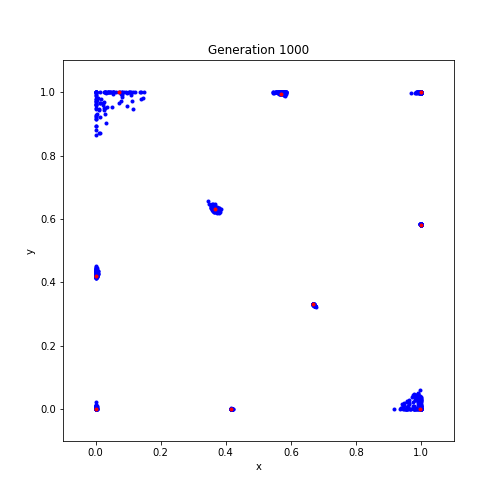

<IPython.core.display.Javascript object>


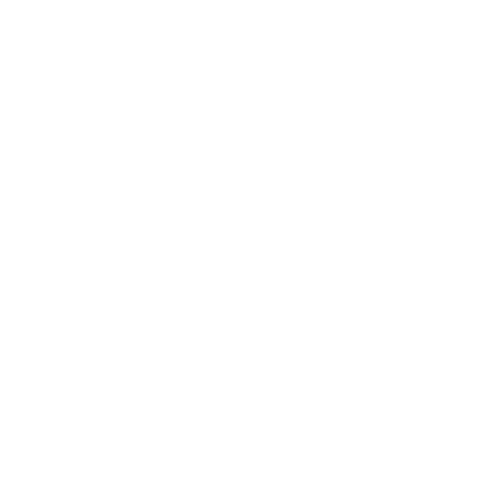

In [17]:
# Progress animation

# %matplotlib notebook
# plot_best_solution_progress(de_strict.iter_best_agent)

%matplotlib notebook
plot_population_progress(de_strict.iter_population, de_strict.iter_best_agent)

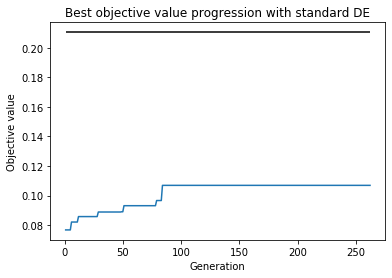

In [9]:
%matplotlib inline
plot_obj_value_progress(de.iter_best_obj_val, optimum, title="Best objective value progression with standard DE")

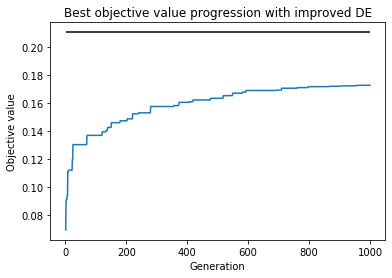

In [10]:
%matplotlib inline
plot_obj_value_progress(de_strict.iter_best_obj_val, optimum, title="Best objective value progression with improved DE")

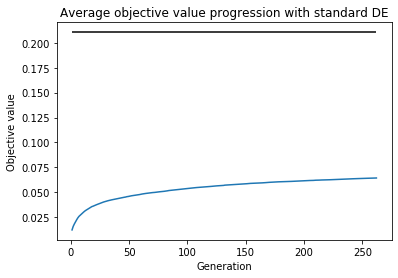

In [11]:
%matplotlib inline
plot_obj_value_progress(de.iter_avg_obj_val, optimum, title="Average objective value progression with standard DE")

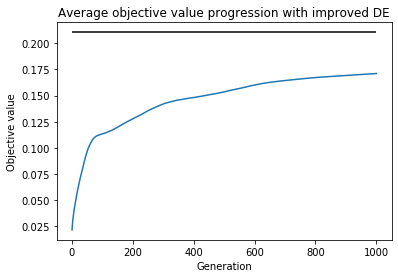

In [12]:
%matplotlib inline
plot_obj_value_progress(de_strict.iter_avg_obj_val, optimum, title="Average objective value progression with improved DE")